In [4]:
import pandas as pd 
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


Input Dataset microchips.csv

# Exercise 1: k-NN Classification

In [5]:
df = pd.read_csv("microchips.csv", header=None, names=['Property1', 'Property2', 'Label'])
df.shape


(118, 3)

In [6]:
df.head(10)

,Property1,Property2,Label
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
5,-0.524770,0.209800,1
6,-0.398040,0.034357,1
7,-0.305880,-0.192250,1
8,0.016705,-0.404240,1
9,0.131910,-0.513890,1


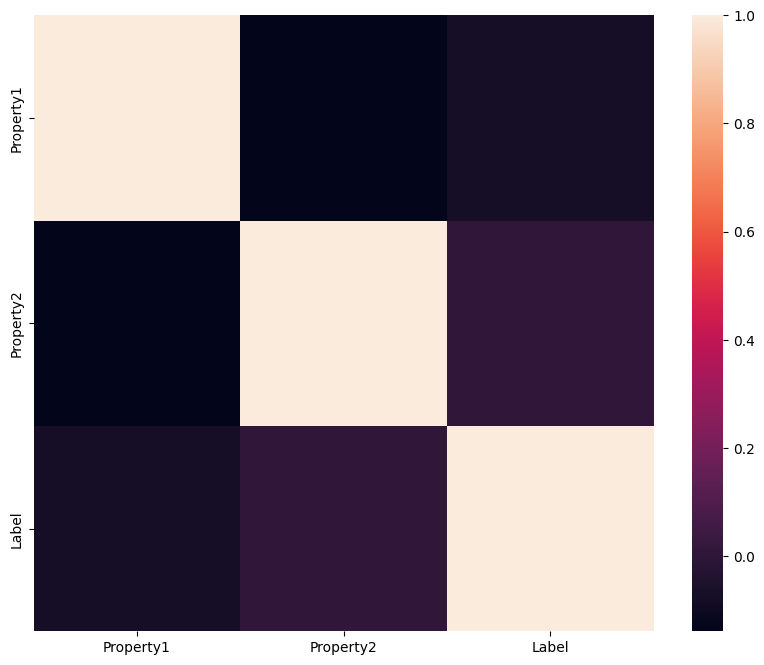

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.show()

## Plot the original microchip data using different markers for the two classes OK and Fail.

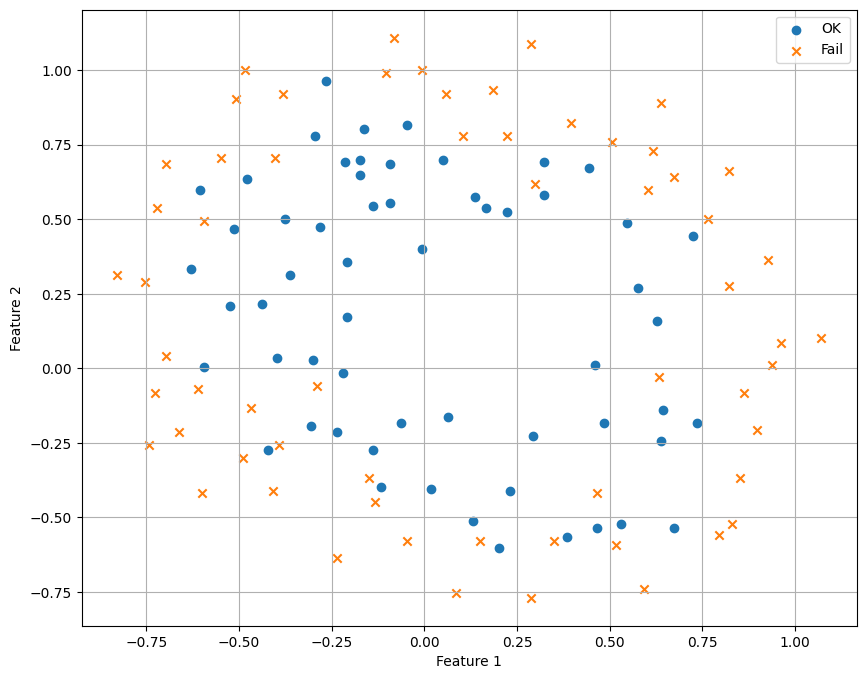

In [8]:

plt.figure(figsize=(10, 8))
for label, marker in zip([1, 0], ['o', 'x']):
    condition = df['Label'] == label
    plt.scatter(df[condition]['Property1'], df[condition]['Property2'], 
                marker=marker, label=('OK' if label == 1 else 'Fail'))

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


## Implement and use k-NN to predict whether three unknown microchips are likely to be OK or Fail. The properties associated with the three unknown microchips are (−0.3, 1.0), (−0.5, −0, 1), and (0.6, 0.0), and you should repeat the experiments for k = 1, 3, 5, 7.

In [9]:
# calculates the Euclidean distance

def euclideanDistance(a, b):
   
    return np.sqrt(np.sum((a - b) ** 2))


#  finds the k nearest neighbors so that the order of distances is ascend.

def kNearestNeighbors(xTrain, yTrain, X_test, k):
    
    distances = []
    for i in range(len(xTrain)):
        distances.append((yTrain[i], euclideanDistance(xTrain[i], X_test)))

    distances.sort(key=lambda x: x[1])

    neighbors = distances[:k]
    
    return neighbors

# predicts the class of a test instance

def predictClassification(neighbors):
    

    classes = []

    for i in range(len(neighbors)):
        classes.append(neighbors[i][0])

    prediction = max(set(classes), key=classes.count)

    return prediction

# knn predict based on a particular k

def knnPredict(xTrain, yTrain, xTest, k):

    predictions = []

    for xtest in xTest:
        neighbors = kNearestNeighbors(xTrain, yTrain, xtest, k)
        prediction = predictClassification(neighbors)
        
        predictions.append(prediction)

    return predictions


In [10]:
xTrain = df[['Property1', 'Property2']].values
yTrain = df['Label'].values

microchips = np.array([
    [-0.3, 1.0],
    [-0.5, -0.1],
    [0.6, 0.0]
])

kValues = [1, 3, 5, 7]
for k in kValues:
    predictions = knnPredict(xTrain, yTrain, microchips, k)
    print(k)
    for i, pred in enumerate(predictions):
        result = "OK" if pred == 1 else "Fail"
        print(f"{i+1}: {microchips[i]} ==> {result}")
    print()

1
1: [-0.3  1. ] ==> OK
2: [-0.5 -0.1] ==> Fail
3: [0.6 0. ] ==> Fail

3
1: [-0.3  1. ] ==> Fail
2: [-0.5 -0.1] ==> Fail
3: [0.6 0. ] ==> OK

5
1: [-0.3  1. ] ==> Fail
2: [-0.5 -0.1] ==> OK
3: [0.6 0. ] ==> OK

7
1: [-0.3  1. ] ==> Fail
2: [-0.5 -0.1] ==> Fail
3: [0.6 0. ] ==> OK



## Display a 2 × 2 plot similar to Figure 1 showing the decision boundary and the training error for k = 1,3,5,7.

In [20]:

def computeDecisionBoundary(X, y, k, h=0.01):

    xMin = X[:, 0].min() - 1
    xMax = X[:, 0].max() + 1
    yMin = X[:, 1].min() - 1
    yMax = X[:, 1].max() + 1


    xx, yy = np.meshgrid(np.arange(xMin, xMax, h), np.arange(yMin, yMax, h))


    Z = np.array([knnPredict(X, y, np.c_[xx.ravel(), yy.ravel()], k)])
    Z = Z.reshape(xx.shape) 

    

    trainPreds = knnPredict(X, y, X, k)
    trainErrors = (trainPreds != y).sum()


    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"training errors = {trainErrors}")   
    plt.show()




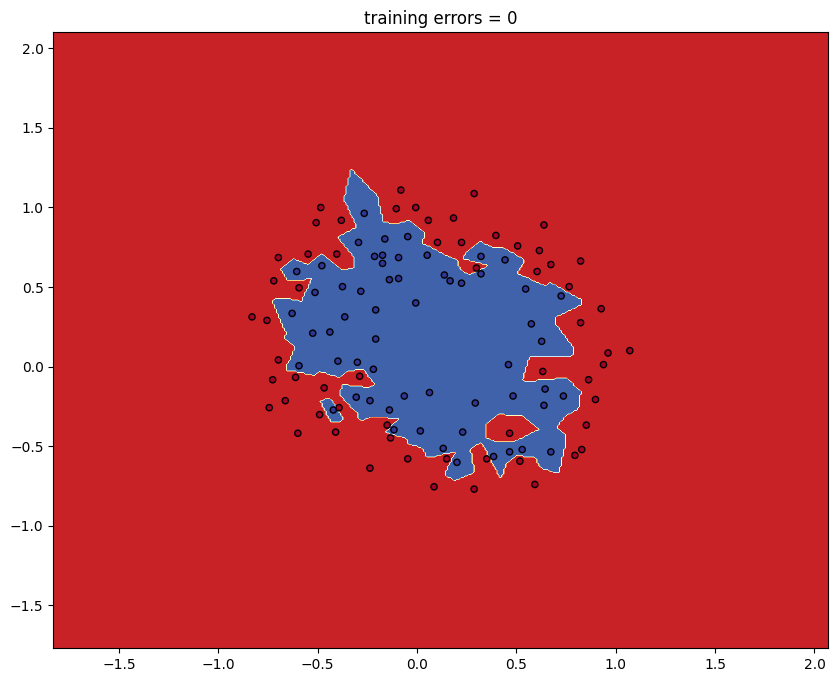

In [21]:
computeDecisionBoundary(xTrain, yTrain, 1)

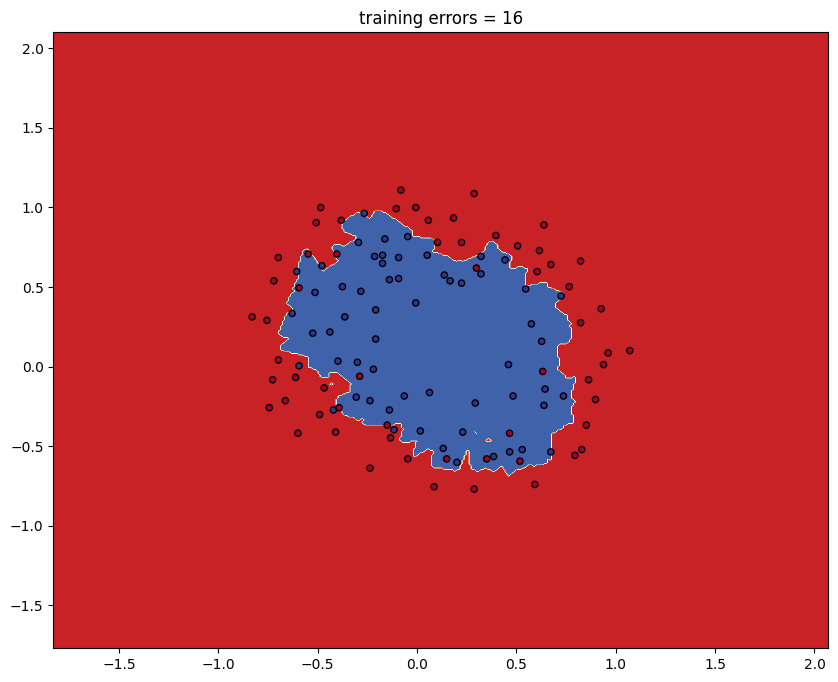

In [32]:
computeDecisionBoundary(xTrain, yTrain, 3)

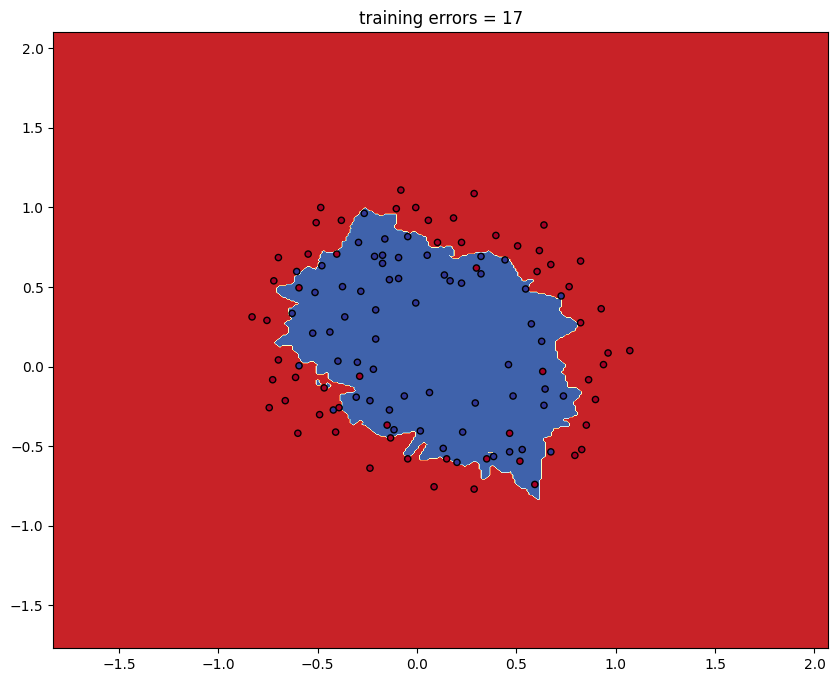

In [33]:
computeDecisionBoundary(xTrain, yTrain, 5)

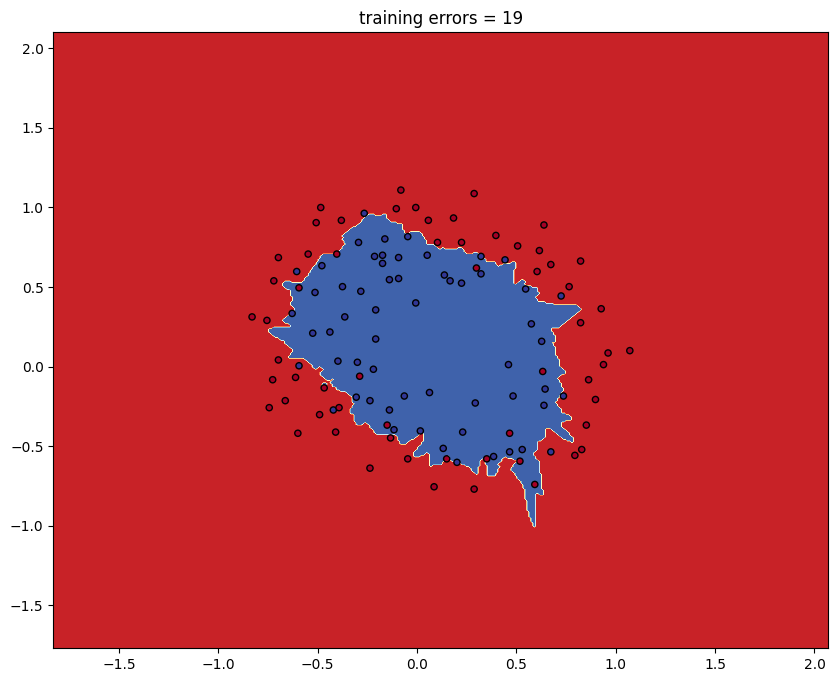

In [34]:
computeDecisionBoundary(xTrain, yTrain, 7)

# Exercise 4: k-NN Classification using scikit-learn

In [27]:

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(xTrain, yTrain)

predictedClasses = knn.predict(microchips)


print(f"k = 1  {predictedClasses}")



k = 1  [1 0 0]


In [29]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(xTrain, yTrain)

predictedClasses = knn.predict(microchips)

print(f"k = 3  {predictedClasses}")

k = 3  [0 0 1]


In [30]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(xTrain, yTrain)

predictedClasses = knn.predict(microchips)

print(f"k = 5  {predictedClasses}")

k = 5  [0 1 1]


In [31]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(xTrain, yTrain)

predictedClasses = knn.predict(microchips)

print(f"k = 7  {predictedClasses}")

k = 7  [0 0 1]
